# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


student_data = pd.DataFrame({'X': [51,27,21,36,48,19,26,54,30], 'Y': [1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,51,1
1,27,5
2,21,9
3,36,4
4,48,2
5,19,9
6,26,6
7,54,0
8,30,3


Draw a dispersion diagram (scatter plot) for the data.

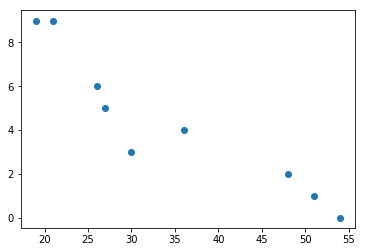

In [3]:
# Your code here.
plt.scatter(student_data["X"], student_data["Y"])


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?


yes, there might be a trend : the younger the students are, the more often they are late to class.



Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
print(np.cov(student_data["X"], student_data["Y"]))


student_data.corr()


[[176.  -40. ]
 [-40.   10.5]]


,X,Y
X,1.000000,-0.930484
Y,-0.930484,1.000000


Covariance and Correlation are two mathematical concepts which are quite commonly used in business statistics. Both of these two determine the relationship and measures the dependency between two random variables. Despite, some similarities between these two mathematical terms, they are different from each other. Correlation is when the change in one item may result in the change in another item. Correlation is considered as the best tool for for measuring and expressing the quantitative relationship between two variables in formula. On the other hand, covariance is when two items vary together.
Covariance is a measure indicating the extent to which two random variables change in tandem. Covariance is a statistical term, defined as a systematic relationship between a pair of random variables wherein a change in one variable reciprocated by an equivalent change in another variable.
Covariance lies between -∞ and +∞	(correlation lies between -1 and 1).

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
import statsmodels.api as sm

X = sm.add_constant(student_data["X"]) # We must add the intercept using the add_constant function
Y = student_data["Y"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     45.16
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000272
Time:                        19:42:27   Log-Likelihood:                -13.784
No. Observations:                   9   AIC:                             31.57
Df Residuals:                       7   BIC:                             31.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2121      1.246      9.798      0.0

/Users/admin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/admin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [6]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(student_data["X"], student_data["Y"])
slope, intercept, r_value, p_value, std_err

(-0.2272727272727273,
 12.212121212121211,
 -0.9304842103984711,
 0.0002723366540428708,
 0.033819264051947455)

This means that our regression equation is:

tardies = 12.212 + -0.227 * age

The r squared is -0.93 which is relatively high. This means that our model captures 93% of the variation in the data.

The p-value is < 0.05, this means that the slope is significantly different from zero.

Plot your regression model on your scatter plot.

[[19]
 [26]
 [54]
 [30]]
[[8.21568627]
 [6.61853832]
 [0.22994652]
 [5.70588235]]


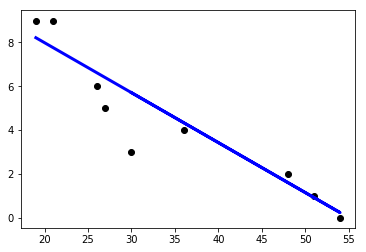

In [7]:
# Your code here.
from sklearn import datasets, linear_model

# Split the data into training/testing sets

X=student_data["X"].values.reshape(len(student_data["X"]),1)
Y=student_data["Y"].values.reshape(len(student_data["Y"]),1)

X_train = X[:-4]
X_test = X[-4:]

# Split the targets into training/testing sets
Y_train = Y[:-4]
Y_test = Y[-4:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)
plt.scatter(X, Y,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

print(X_test)
print(Y_pred)


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# Your response here. 

This means that our regression equation is:

tardies = 12.212 + -0.227 * age

The r squared is -0.93 which is relatively high. This means that our model captures 93% of the variation in the data.

The p-value is < 0.05, this means that the slope is significantly different from zero.

==> Age is a good predictor of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
vehicle = pd.read_csv('vehicles.csv')
vehicle.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Your response here. 
var = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

for v in var:
    df = vehicle[[v, 'CO2 Emission Grams/Mile']]
    print(df.corr())
    print('\n')


                           Year  CO2 Emission Grams/Mile
Year                     1.0000                  -0.2223
CO2 Emission Grams/Mile -0.2223                   1.0000


                         Cylinders  CO2 Emission Grams/Mile
Cylinders                 1.000000                 0.752393
CO2 Emission Grams/Mile   0.752393                 1.000000


                         Fuel Barrels/Year  CO2 Emission Grams/Mile
Fuel Barrels/Year                 1.000000                 0.986189
CO2 Emission Grams/Mile           0.986189                 1.000000


                         Combined MPG  CO2 Emission Grams/Mile
Combined MPG                 1.000000                -0.926229
CO2 Emission Grams/Mile     -0.926229                 1.000000


                         Fuel Cost/Year  CO2 Emission Grams/Mile
Fuel Cost/Year                 1.000000                 0.930865
CO2 Emission Grams/Mile        0.930865                 1.000000




Which variable do you think will be the most important in determining CO2 emissions?  --> Fuel Barrels/Year
Which provides the least amount of helpful information for determining CO2 emissions? --> Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [16]:
vehicle[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [19]:
# Your response here. 

X = sm.add_constant(vehicle[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]) # adding a constant
Y = vehicle['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                             19:47:44   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [11]:
# R-squared:    0.981

#Jarque-Bera (JB):        246941260.782   >>> p > 5%  >>> les residus suivent une loi normale


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

# Your response here. 

 What are the most important varibles in your model and why?  ==> Fuel Barrels/Year 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
# Your code here. 
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [26]:
df1 = df.sample(df.shape[0])
df1

,X,Y
6,11,8
1,3,2
3,6,4
2,4,4
4,8,5
5,9,7
7,14,13
0,1,1


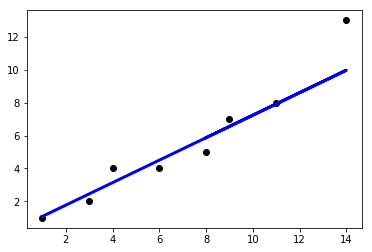

In [27]:
# Your code here.

# Split the data into training/testing sets

X=df1["X"].values.reshape(len(df1["X"]),1)
Y=df1["Y"].values.reshape(len(df1["Y"]),1)

X_train = X[:-4]
X_test = X[-4:]

# Split the targets into training/testing sets
Y_train = Y[:-4]
Y_test = Y[-4:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)
plt.scatter(X, Y,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [28]:
# Your response here. 
slope, intercept, r_value, p_value, std_err = linregress(df1["X"], df1["Y"])
slope, intercept, r_value, p_value, std_err

(0.8484848484848485,
 -0.43939393939393945,
 0.9652303546573691,
 0.00010236374464090686,
 0.09380896778286217)

In [29]:
X = sm.add_constant(df1["X"]) # We must add the intercept using the add_constant function
Y = df1["Y"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#R-squared:      0.932


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000102
Time:                        19:50:30   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

/Users/admin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/admin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [40]:
# Your response here. 

df2 = df[df.X != 14]
newdf = df2.sample(df2.shape[0])


X = sm.add_constant(newdf["X"]) # We must add the intercept using the add_constant function
Y = newdf["Y"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

#R-squared:                       0.943

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000264
Time:                        19:53:42   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

/Users/admin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/admin/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


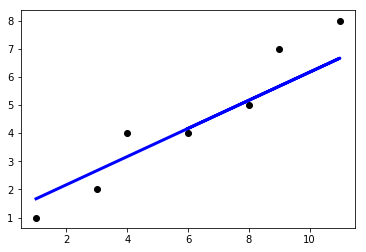

In [42]:

X=newdf["X"].values.reshape(len(newdf["X"]),1)
Y=newdf["Y"].values.reshape(len(newdf["Y"]),1)

X_train = X[:-4]
X_test = X[-4:]

# Split the targets into training/testing sets
Y_train = Y[:-4]
Y_test = Y[-4:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)
plt.scatter(X, Y,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# without the outlier, the plot line better resume data trend.
#R-squared:   0.943 is higher
